피자, 햄버거, 샌드위치, 토스트 및 유사 음식을 직접 조리하여 일반 소비자에게 판매하는 산업활동을 말한다.

<예시>
·피자 전문점
·샌드위치 전문점
·햄버거 전문점
·토스트 전문점

In [1]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [2]:
data = pd.read_csv("업종별/피자 햄버거 샌드위치 및 유사 음식점업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351478 entries, 0 to 1351477
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   REG_YYMM      1351478 non-null  object
 1   CARD_SIDO_NM  1351478 non-null  object
 2   CARD_CCG_NM   1346780 non-null  object
 3   STD_CLSS_NM   1351478 non-null  object
 4   HOM_SIDO_NM   1351478 non-null  object
 5   HOM_CCG_NM    1343367 non-null  object
 6   AGE           1351478 non-null  object
 7   SEX_CTGO_CD   1351478 non-null  int64 
 8   FLC           1351478 non-null  int64 
 9   CSTMR_CNT     1351478 non-null  int64 
 10  AMT           1351478 non-null  int64 
 11  CNT           1351478 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 134.0+ MB
None


In [4]:
#안쓰는 컬럼 드랍, 정제
df=data.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [5]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351478 entries, 0 to 1351477
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   REG_YYMM      1351478 non-null  object
 1   CARD_SIDO_NM  1351478 non-null  object
 2   HOM_SIDO_NM   1351478 non-null  object
 3   AGE           1351478 non-null  object
 4   SEX_CTGO_CD   1351478 non-null  int64 
 5   FLC           1351478 non-null  int64 
 6   CSTMR_CNT     1351478 non-null  int64 
 7   AMT           1351478 non-null  int64 
 8   CNT           1351478 non-null  int64 
 9   year          1351478 non-null  int64 
 10  month         1351478 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 123.7+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0   201901           강원          강원  10s            1    1         59   
1   201901           강원          강원  10s            2    1         66   
2   201901           강원          강원  20

In [6]:
print(df.CARD_SIDO_NM.unique())
print(df.HOM_SIDO_NM.unique())

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']
['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']


CARD_SIDO_NM
세종      4451945877
제주     15666294134
충북     21294163365
전남     21676324817
강원     22895549505
대전     22939658574
울산     24013945764
전북     27916570802
광주     31365664373
충남     32975283868
경북     37548515578
인천     58208362714
대구     59986141994
경남     62674490982
부산     92210277522
경기    262344370173
서울    302413723895
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

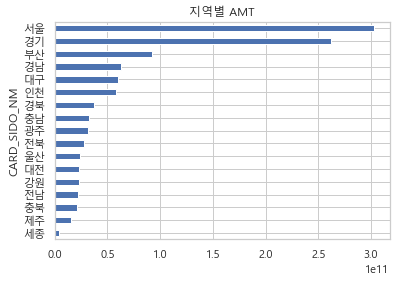

In [7]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

REG_YYMM
201901    75362999290
201902    68454177238
201903    75701534533
201904    75046904161
201905    79222053101
201906    77478178376
201907    80015933980
201908    79914002567
201909    73474585461
201910    73772423844
201911    66811648508
201912    75293316726
202001    71742418414
202002    62318869082
202003    65972238656
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

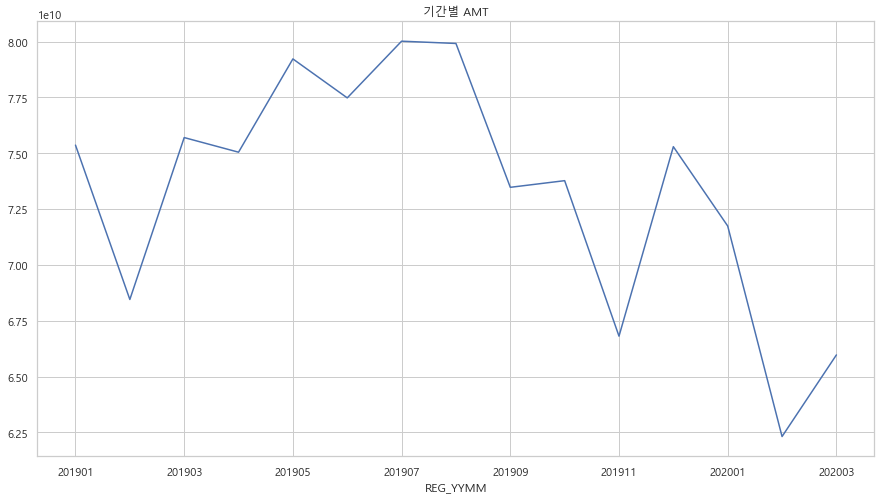

In [8]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

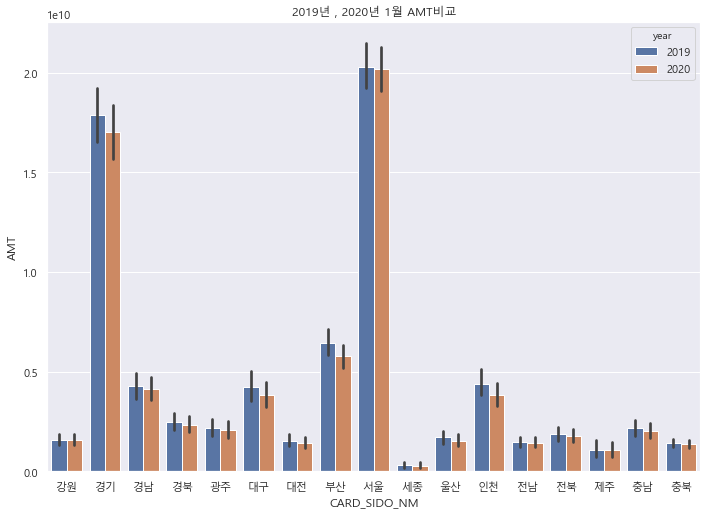

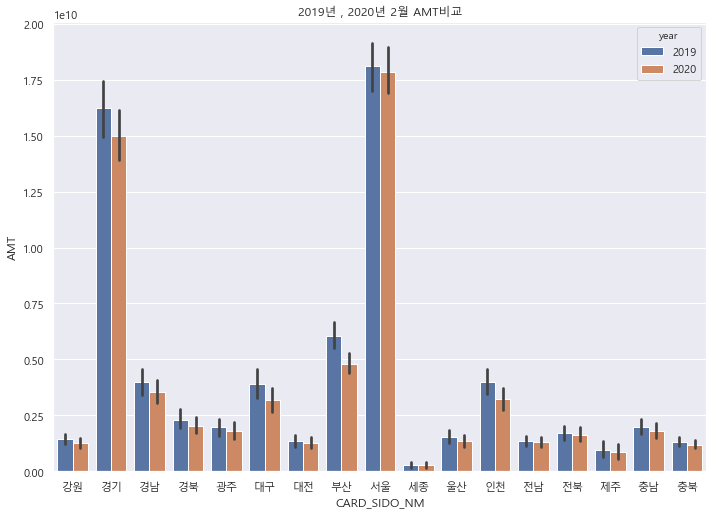

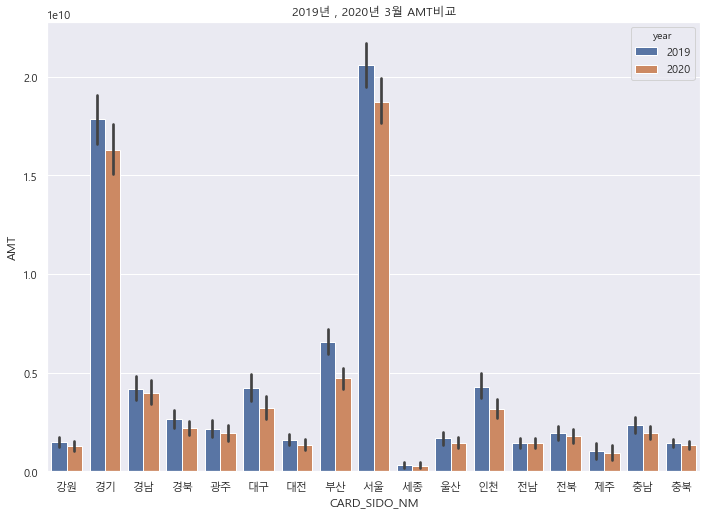

In [9]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

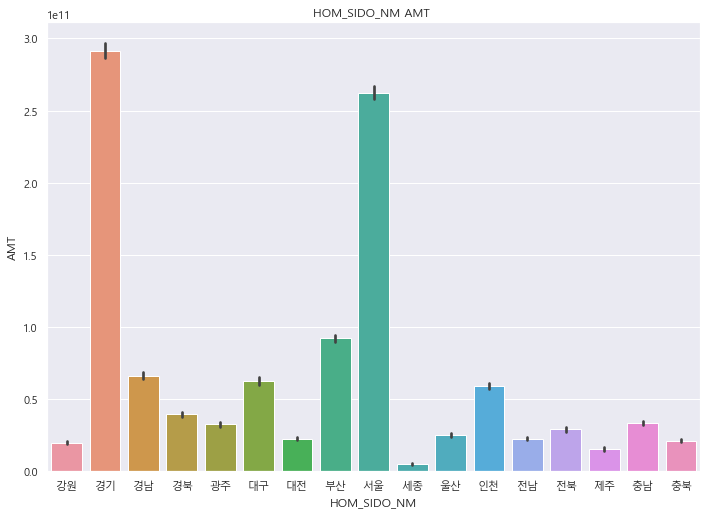

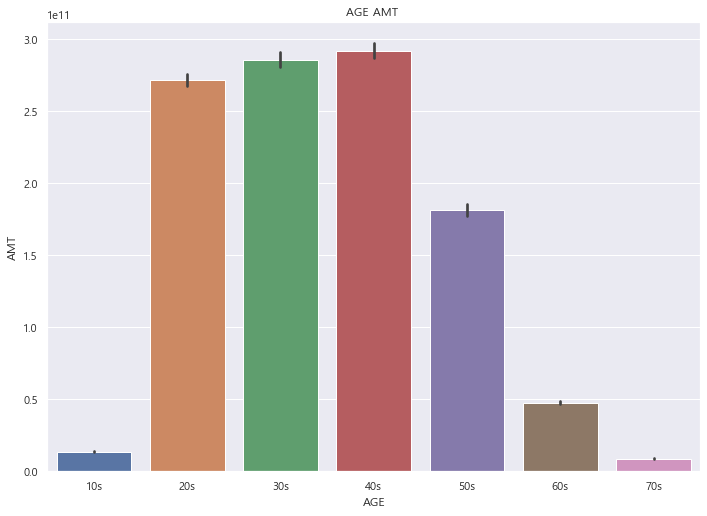

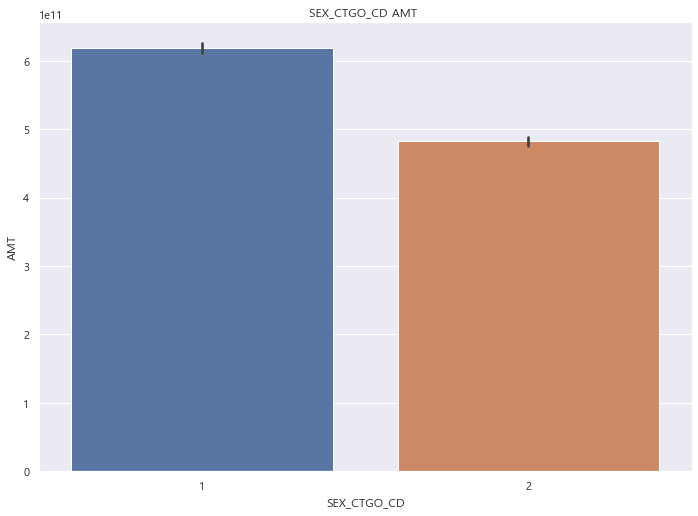

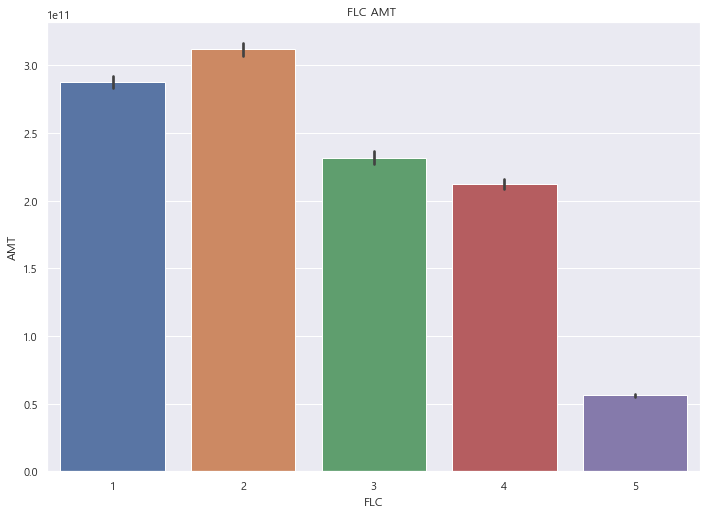

In [10]:
cols = ['HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()